In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import re
# import unidecode

# Merchants

In [2]:
merchants = pd.read_csv('./merchants.csv')

In [3]:
merchants.service_group.value_counts()

fnb                               636
food                              629
cvs                               567
beverage                          564
other offline payment services    227
supermarket                       113
shopping                           37
other offlinepayment                1
Name: service_group, dtype: int64

In [4]:
merchants.loc[merchants['service_group'] == 'other offlinepayment', 'service_group'] = 'other'
merchants.loc[merchants['service_group'] == 'other offline payment services', 'service_group'] = 'other'

In [5]:
merchants['service_id'] = merchants['service_id'].astype(str)
merchants['store_id'] = merchants['store_id'].astype(str)
merchants['unique_id'] = merchants['service_id'] + '-' + merchants['store_id']

In [6]:
merchants.drop_duplicates(subset='unique_id', keep='last');

In [7]:
merchants.service_group.fillna('other', inplace=True);

In [8]:
merchants

,service_id,store_id,service_group,merchant_name,merchant_address,store_name,store_address,store_longitude,store_latitude,unique_id
0,1058241667815469540,249887925492461203,other,CÔNG TY CP TMDV TVTK THỜI TRANG VIỆT,"189A Hai Bà Trưng , P.6, Quận 3 TPHCM",Concept Nguyễn Trãi Cần Thơ,"41-41A-43 Nguyễn Trãi, Q. Ninh Kiều, Cần Thơ",105.785046,10.040508,1058241667815469540-249887925492461203
1,1058241667815469540,6272474026035536581,other,CÔNG TY CP TMDV TVTK THỜI TRANG VIỆT,"189A Hai Bà Trưng , P.6, Quận 3 TPHCM",Concept Hậu Giang,"Số 410 Hậu Giang, Phường 12, Quận 6, Tp. HCM",106.638935,10.749251,1058241667815469540-6272474026035536581
2,8073873840719601655,2217087971996193230,beverage,HỘ KINH DOANH - QUÁCH THỊ HƯƠNG DUYÊN,"444 Hoàng Văn Thụ, Phường 2, Quận Tân Bình, Th...",Sharetea Hoàng Văn Thụ,"444 Hoàng Văn Thụ, Phường 4, Quận Tân Bình, Th...",106.655742,10.795501,8073873840719601655-2217087971996193230
3,1058241667815469540,7296552596579579660,other,CÔNG TY CP TMDV TVTK THỜI TRANG VIỆT,"189A Hai Bà Trưng , P.6, Quận 3 TPHCM",Concept Cách Mạng tháng 8 HCM,"Số 484 - 486 Cách Mạng Tháng Tám, Phường 11, Q...",106.668518,10.784919,1058241667815469540-7296552596579579660
4,1058241667815469540,4707467693322385152,other,CÔNG TY CP TMDV TVTK THỜI TRANG VIỆT,"189A Hai Bà Trưng , P.6, Quận 3 TPHCM",Concept Vạnh Hạnh Mall,"TTTM,Số 11 Sư Vạn Hạnh, Đường 3/2, Phường 12, ...",106.669971,10.769976,1058241667815469540-4707467693322385152
...,...,...,...,...,...,...,...,...,...,...
2968,6808347026108568574,6484164205001681137,food,CÔNG TY TNHH DỊCH VỤ THỰC PHẨM VÀ GIẢI KHÁT VI...,"Lầu 5, tòa nhà Sài Gòn Royal, 91 Pasteur, P. B...",POPEYES DƯƠNG BÁ TRẠC,"222 - 228 Dương Bá Trạc, Phường 2, Quận 8, Th...",106.6891098,10.7462651,6808347026108568574-6484164205001681137
2969,6808347026108568574,1503822611323068711,food,CÔNG TY TNHH DỊCH VỤ THỰC PHẨM VÀ GIẢI KHÁT VI...,"Lầu 5, tòa nhà Sài Gòn Royal, 91 Pasteur, P. B...",POPEYES NGUYỄN BỈNH KHIÊM,"58/13 Nguyễn Bỉnh Khiêm, Phường Đa Kao, Quận ...",106.6992663,10.7927827,6808347026108568574-1503822611323068711
2970,6808347026108568574,7294991517476066382,food,CÔNG TY TNHH DỊCH VỤ THỰC PHẨM VÀ GIẢI KHÁT VI...,"Lầu 5, tòa nhà Sài Gòn Royal, 91 Pasteur, P. B...",POPEYES NGUYỄN THỊ THẬP,"332 Nguyễn Thị Thập, Phường Tân Quy, Quận 7, T...",106.7049147,10.739731,6808347026108568574-7294991517476066382
2971,6808347026108568574,6091305737323984244,food,CÔNG TY TNHH DỊCH VỤ THỰC PHẨM VÀ GIẢI KHÁT VI...,"Lầu 5, tòa nhà Sài Gòn Royal, 91 Pasteur, P. B...",POPEYES PHÚ MỸ HƯNG,"62 Nguyễn Đức Cảnh, Phường Tân Phong, Quận 7, ...",106.708509,10.726551,6808347026108568574-6091305737323984244


# Transactions

In [9]:
transactions = pd.read_csv('./transactions.csv')

In [10]:
transactions['user_id'] = transactions['user_id'].astype(str)
transactions['service_id'] = transactions['service_id'].astype(str)
transactions['store_id'] = transactions['store_id'].astype(str)
transactions['unique_id'] = transactions['service_id'] + '-' + transactions['store_id']
# transactions = transactions[['user_id', 'unique_id', 'amount']]

In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008720 entries, 0 to 1008719
Data columns (total 6 columns):
timestamp     1008720 non-null int64
user_id       1008720 non-null object
service_id    1008720 non-null object
store_id      1008720 non-null object
amount        1008720 non-null int64
unique_id     1008720 non-null object
dtypes: int64(2), object(4)
memory usage: 46.2+ MB


In [12]:
transactions2train = transactions.drop(columns = ['timestamp'])
df_count = transactions2train.groupby(['user_id', 'service_id', 'store_id'], as_index=False).count()
df_mean = transactions2train.groupby(['user_id', 'service_id'], as_index=False).sum()
df_mean['visit_count'] = df_count['amount']
transactions2train = df_mean

In [13]:
transactions2train

,user_id,service_id,amount,visit_count
0,1000121902738565702,6624136956482465650,385000,1
1,1000121902738565702,7241075282237721387,67000,1
2,1000121902738565702,922770840377832605,134000,1
3,1000125153834388186,4696475929912495191,1133000,1
4,1000125153834388186,7435641053063427914,75000,1
...,...,...,...,...
724864,999967723811113076,6683159578094575932,176000,1
724865,999983852027909885,1161222413519607568,164000,1
724866,999983852027909885,1519391066364067495,393000,1
724867,999983852027909885,7217455669218222351,46000,1


In [14]:
df_total_sum = transactions.groupby('user_id', as_index=False).sum()[['user_id', 'amount']]
df_total_sum = df_total_sum.rename(columns={'amount':'total_amount'})
transactions2train = transactions2train.merge(df_total_sum, how='left')
transactions2train['favor'] = transactions2train['amount'] / transactions2train['total_amount']
transactions2train = transactions2train[~((transactions2train['favor'] == 1) & (transactions2train['visit_count'] == 1))]

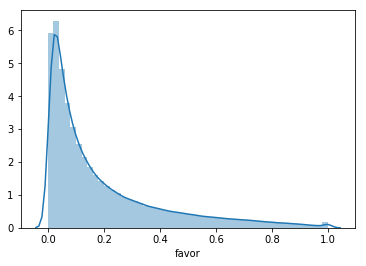

In [15]:
sns.distplot(transactions2train['favor'])

In [16]:
transactions2train.head()

,user_id,service_id,amount,visit_count,total_amount,favor
0,1000121902738565702,6624136956482465650,385000,1,586000,0.656997
1,1000121902738565702,7241075282237721387,67000,1,586000,0.114334
2,1000121902738565702,922770840377832605,134000,1,586000,0.228669
3,1000125153834388186,4696475929912495191,1133000,1,1725000,0.656812
4,1000125153834388186,7435641053063427914,75000,1,1725000,0.043478


In [17]:
transactions2train['rating'] = 0
transactions2train.loc[transactions2train['visit_count'] > 2, 'rating'] = 1
transactions2train.loc[transactions2train['favor'] > 0.12, 'rating'] = 1

In [18]:
transactions2train.rating.value_counts()

1    355333
0    351867
Name: rating, dtype: int64

In [19]:
df = transactions2train
uf = df.user_id.value_counts()
nu = uf[uf < 4].index
df = df[~df['user_id'].isin(nu)]
df.rating.value_counts()

0    334296
1    292007
Name: rating, dtype: int64

In [20]:
# For transaction with 0 amount, use the visit_count (pay 1VND per visit)
transactions2train.loc[transactions2train.amount == 0, 'amount'] = transactions2train.loc[transactions2train.amount == 0, 'visit_count']

In [21]:
# user_freq = transactions['user_id'].value_counts()
# new_user = user_freq[user_freq<10].index
# transactions2train = transactions2train[~transactions2train['user_id'].isin(new_user)]

In [22]:
# transactions2train.loc[transactions2train['visit_count'] > 1, 'visit_count'] = 2

In [23]:
transactions2train.visit_count.value_counts()

1      624720
2       39240
3       14850
4        7976
5        4970
        ...  
90          1
77          1
73          1
166         1
191         1
Name: visit_count, Length: 110, dtype: int64

In [24]:
merchants_service_cat = merchants[['service_id', 'service_group']].drop_duplicates(subset=['service_id'])
transactions2train = transactions2train.merge(merchants_service_cat, how='left')
transactions2train.fillna('other', inplace=True)

In [25]:
# create map to convert from code to id and vice versal
usercode2id = transactions2train['user_id'].astype('category')
usercode2id = dict(enumerate(usercode2id.cat.categories))
servicecode2id = transactions2train['service_id'].astype('category')
servicecode2id = dict(enumerate(servicecode2id.cat.categories))
userid2code = dict(map(reversed, usercode2id.items()))
serviceid2code = dict(map(reversed, servicecode2id.items()))

# create code columns
transactions2train['user_code'] = transactions2train['user_id'].astype('category').cat.codes
transactions2train['service_code'] = transactions2train['service_id'].astype('category').cat.codes

# save file to use later
with open('./data/usercode2id.dict', 'wb') as usercode2idfile:
    pickle.dump(usercode2id, usercode2idfile)
with open('./data/servicecode2id.dict', 'wb') as servicecode2idfile:
    pickle.dump(servicecode2id, servicecode2idfile)
with open('./data/userid2code.dict', 'wb') as userid2codefile:
    pickle.dump(userid2code, userid2codefile)
with open('./data/serviceid2code.dict', 'wb') as serviceid2codefile:
    pickle.dump(serviceid2code, serviceid2codefile)

In [26]:
transactions2train.to_csv('./data/transactions2train.csv')

In [27]:
merchants.to_csv('./data/modified_merchants.csv')

In [28]:
transactions2train[transactions2train['user_id'] == 1]

,user_id,service_id,amount,visit_count,total_amount,favor,rating,service_group,user_code,service_code


In [29]:
userid2code

{'1766928192100782890': 12753,
 '2025240575968581593': 16970,
 '8148287870543161935': 118125,
 '3603870636002613150': 43022,
 '3974962663098768245': 49242,
 '6451392299026378292': 90188,
 '8908566712918570806': 130559,
 '7626145544093478941': 109512,
 '5196864405626561993': 69444,
 '8662473018488331524': 126447,
 '3027279240216129882': 33545,
 '4251119698123428501': 53818,
 '2602454968995352534': 26511,
 '1048967342934708366': 842,
 '2129811937548425041': 18721,
 '7789189336123475782': 112209,
 '1710889509853675810': 11868,
 '1121518039819747294': 2079,
 '338092182921068006': 39381,
 '2877608133445220324': 31048,
 '5282528037393632754': 70897,
 '7272935513614504928': 103664,
 '3969889090522680333': 49151,
 '4226532553794802328': 53406,
 '6438441357401283199': 89966,
 '2399396327107250179': 23171,
 '5249374458546741127': 70341,
 '1979838884146718816': 16208,
 '2790282888305056508': 29567,
 '4679991363374855023': 60956,
 '2532297196051181293': 25354,
 '1234634598658654228': 3959,
 '21260